<p style="font-size:28px; font-weight:bold; color:#e65100;">
Diabetes Prediction — Ensemble Learning Project Overview
</p>

<p>
This project follows a structured, end-to-end machine learning workflow focused on
<strong>feature understanding, feature engineering, preprocessing, modeling, and ensembling</strong>.
The goal was to build a robust and well-generalized prediction pipeline for a Kaggle competition.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
1. Feature Type Identification
</p>

<p>
The first step was to carefully analyze the dataset and identify the nature of each feature.
I separated the columns into:
</p>

<ul>
  <li><strong>Numerical features</strong></li>
  <li><strong>Categorical features</strong>, further divided into:</li>
  <ul>
    <li>Nominal categorical features (no inherent order)</li>
    <li>Ordinal categorical features (meaningful order)</li>
    <li>Binary features (two-state values such as 0/1 or Yes/No)</li>
  </ul>
</ul>

<p>
This distinction is essential because each category type requires a different encoding strategy.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
2. Correlation Analysis (Before Feature Engineering)
</p>

<p>
After identifying numerical columns, I analyzed correlations between them to understand
relationships, redundancy, and potential multicollinearity.
This helped confirm which numerical features move together and which provide unique information.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
3. Feature Engineering (Overview Only)
</p>

<p>
Next, I performed feature engineering to create new, more informative variables from the original data.
</p>

<p style="color:#6d4c41;">
<strong>Note:</strong> The detailed explanation of feature engineering is intentionally excluded from this overview
and will be discussed separately.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
4. Re-Grouping & Correlation Check (After Feature Engineering)
</p>

<p>
After adding new features, I regrouped the dataset into numerical and categorical features
and re-evaluated correlations to ensure the new features introduced meaningful signal
without unnecessary redundancy.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
5. Feature Preprocessing
</p>

<p>
To prepare the data for modeling, the following preprocessing steps were applied:
</p>

<ul>
  <li><strong>OrdinalEncoder</strong> for ordinal categorical features</li>
  <li><strong>OneHotEncoder</strong> for nominal categorical features</li>
  <li><strong>StandardScaler</strong> for numerical features</li>
</ul>

<p>
Since the numerical features were already close to normally distributed and not heavily skewed,
no additional transformations were required.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
6. Modeling
</p>

<p>
Two gradient-boosting models were used for prediction:
<strong>CatBoost</strong> and <strong>XGBoost</strong>.
Both models are well-suited for structured tabular data and offer complementary strengths.
</p>

<hr>

<p style="font-size:20px; font-weight:bold; color:#f57c00;">
7. Ensemble Learning (Soft Voting)
</p>

<p>
Finally, the models were combined using <strong>soft voting</strong>,
where the final prediction is obtained by averaging the predicted probabilities
from CatBoost and XGBoost.
</p>

<p style="color:#8d6e63;">
<strong>Summary:</strong>  
This project emphasizes a clean and disciplined ML pipeline:
feature understanding → feature engineering → preprocessing → modeling → ensemble learning.
</p>


# Importing the required libraries

In [1]:
import numpy as np 
import pandas as pd 
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from category_encoders import CatBoostEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from lightgbm.callback import early_stopping

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')

In [3]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
print(train.shape)
print(test.shape)

(700000, 26)
(300000, 25)


In [5]:
test.head( )

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [6]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Examining the dataset: 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [9]:
train.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [10]:
X = train.drop(['id','diagnosed_diabetes'],axis = 1)
y = train['diagnosed_diabetes']

# Grouping differnet types of data together: 

In [11]:
ordinal_cols = ["education_level", "income_level"]
ordinal_categories = [
    ["No formal", "Highschool", "Graduate", "Postgraduate"], 
    ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]
]

nominal_cols = ["gender", "ethnicity", "smoking_status", "employment_status"]

binary_cols = ["family_history_diabetes", "hypertension_history", "cardiovascular_history"]

numerical_cols = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
    'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides'
]


categorical_cols = ["gender", "ethnicity", "education_level", "income_level",
                    "smoking_status", "employment_status",
                    "family_history_diabetes", "hypertension_history", 
                    "cardiovascular_history"]

In [12]:
train['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

# Examining the correlations: 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


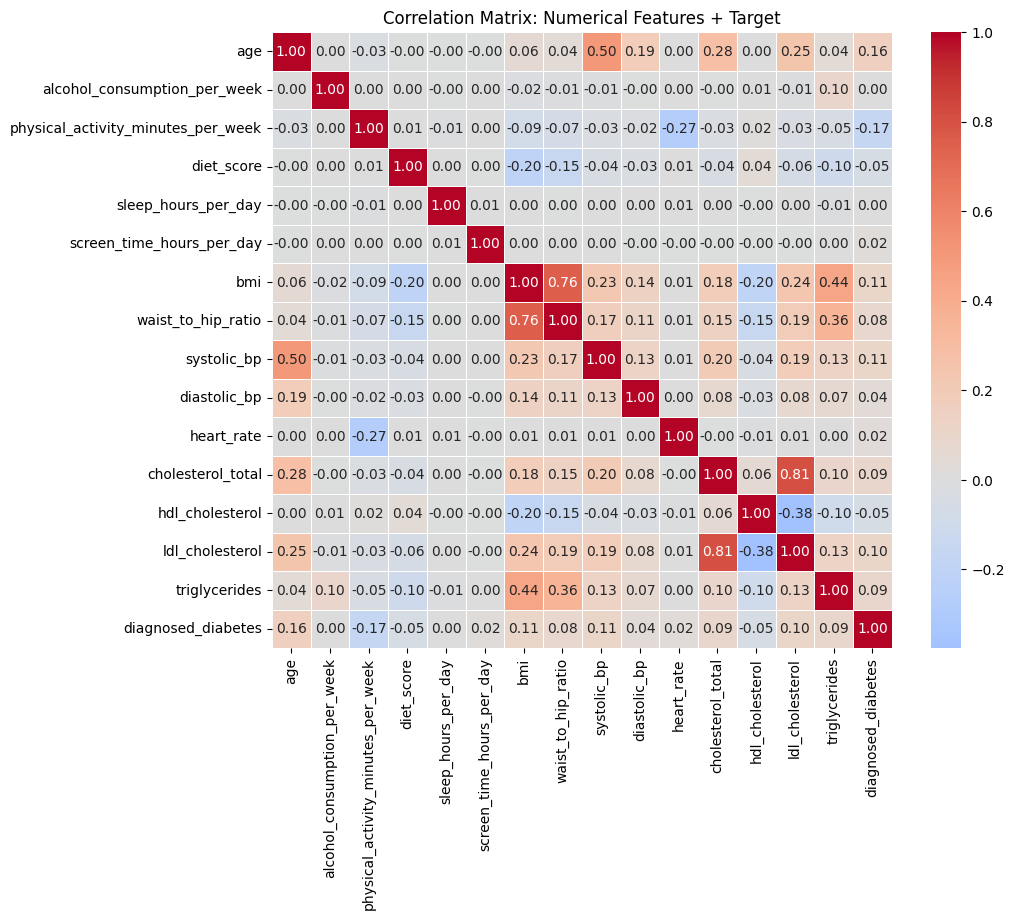

In [13]:
num_df = train[numerical_cols]
num_df_with_target = num_df.copy()
num_df_with_target['diagnosed_diabetes'] = y
corr_matrix = num_df_with_target.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix: Numerical Features + Target")
plt.show()

# Feature engineering : 

<p style="font-size:24px; font-weight:bold; color:#e65100;">
Feature Engineering — Detailed Explanation
</p>

<p>
The feature engineering stage focuses on transforming raw clinical and lifestyle measurements
into more informative indicators that better capture physiological relationships and health risk patterns.
Each engineered feature is designed to reflect medically meaningful interactions rather than isolated values.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Blood Pressure–Related Features
</p>

<p>
<strong>Pulse Pressure</strong> represents the difference between systolic and diastolic blood pressure.
It reflects arterial stiffness and cardiovascular strain, which are important risk indicators for metabolic
and cardiovascular diseases, including diabetes.
</p>

<p>
<strong>Mean Arterial Pressure</strong> approximates the average pressure in the arteries during a single
cardiac cycle. Unlike raw blood pressure readings, it captures sustained blood flow and organ perfusion,
providing a more stable measure of circulatory load.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Cholesterol and Lipid Ratio Features
</p>

<p>
<strong>Total Cholesterol to HDL Ratio</strong> expresses the balance between harmful and protective cholesterol.
Higher values indicate a greater proportion of total cholesterol relative to “good” HDL cholesterol,
which is commonly associated with increased metabolic and cardiovascular risk.
</p>

<p>
<strong>LDL to HDL Ratio</strong> focuses specifically on the relationship between “bad” LDL cholesterol
and protective HDL cholesterol. This ratio is often more informative than absolute LDL values alone
because it accounts for the body’s ability to counterbalance lipid buildup.
</p>

<p>
<strong>Triglycerides to HDL Ratio</strong> is a widely used surrogate marker for insulin resistance.
Elevated triglycerides combined with low HDL levels are strongly linked to metabolic syndrome
and diabetes risk.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Obesity and Age Interaction Features
</p>

<p>
<strong>BMI–Age Interaction</strong> combines body mass index with age to reflect how excess body weight
impacts metabolic health differently across the lifespan. The same BMI can have very different implications
for younger versus older individuals.
</p>

<p>
<strong>Waist-to-Hip Ratio and BMI Interaction</strong> captures both overall obesity and fat distribution.
Central (abdominal) obesity is more strongly associated with insulin resistance than BMI alone,
and this interaction emphasizes that combined effect.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Lifestyle and Age Interaction Feature
</p>

<p>
<strong>Alcohol Consumption–Age Interaction</strong> reflects how alcohol intake interacts with aging.
Alcohol-related metabolic effects tend to compound over time, and this feature helps capture
long-term lifestyle risk rather than short-term consumption alone.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Rationale for Dropping Raw Features
</p>

<p>
After creating these composite indicators, the original raw variables were removed.
This reduces redundancy, prevents multicollinearity, and encourages the model to focus
on higher-level, physiologically meaningful signals rather than overlapping raw measurements.
</p>

<hr>


In [14]:
train_featured = train.copy()

eps = 1e-6

In [15]:
def apply_feature_engineering(df, eps=1e-6):
    df_fe = df.copy()

    # Blood pressure
    df_fe["pulse_pressure"] = df_fe["systolic_bp"] - df_fe["diastolic_bp"]
    df_fe["mean_arterial_pressure"] = (
        df_fe["diastolic_bp"] + (df_fe["systolic_bp"] - df_fe["diastolic_bp"]) / 3
    )

    # Cholesterol ratios
    df_fe["chol_hdl_ratio"] = df_fe["cholesterol_total"] / (df_fe["hdl_cholesterol"] + eps)
    df_fe["ldl_hdl_ratio"] = df_fe["ldl_cholesterol"] / (df_fe["hdl_cholesterol"] + eps)
    df_fe["trig_hdl_ratio"] = df_fe["triglycerides"] / (df_fe["hdl_cholesterol"] + eps)

    # Obesity + age
    df_fe["bmi_age"] = df_fe["bmi"] * df_fe["age"]
    df_fe["waist_bmi"] = df_fe["waist_to_hip_ratio"] * df_fe["bmi"]

    # Lifestyle
    df_fe["alcohol_age"] = df_fe["alcohol_consumption_per_week"] * df_fe["age"]

    # Drop raw features
    df_fe.drop(columns=[
        "systolic_bp", "diastolic_bp",
        "cholesterol_total", "hdl_cholesterol",
        "ldl_cholesterol", "triglycerides",
        "bmi", "waist_to_hip_ratio",
        "age", "alcohol_consumption_per_week"
    ], inplace=True)

    return df_fe


In [16]:
train_featured = apply_feature_engineering(train)

In [17]:
print("Original shape:", train.shape)
print("Featured shape:", train_featured.shape)

train_featured.head()

Original shape: (700000, 26)
Featured shape: (700000, 24)


,id,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,heart_rate,gender,ethnicity,education_level,income_level,...,cardiovascular_history,diagnosed_diabetes,pulse_pressure,mean_arterial_pressure,chol_hdl_ratio,ldl_hdl_ratio,trig_hdl_ratio,bmi_age,waist_bmi,alcohol_age
0,637949,144,4.3,7.3,5.5,65,Female,Black,Highschool,Lower-Middle,...,0,1.0,32,78.666667,3.254237,1.677966,1.644068,1386.0,19.173,120
1,656465,48,4.7,7.2,9.1,71,Female,Hispanic,Graduate,Middle,...,0,0.0,41,92.666667,2.964286,1.482143,2.196429,1330.0,24.472,100
2,337739,123,3.4,7.0,7.1,85,Female,White,Highschool,Lower-Middle,...,0,1.0,23,91.666667,3.125000,1.578125,2.296875,819.4,21.208,34
3,230222,26,6.1,7.3,5.0,61,Male,Hispanic,Highschool,Middle,...,0,1.0,37,94.333333,4.645833,2.854167,2.395833,1190.8,19.007,104
4,82039,70,4.9,8.8,7.8,63,Female,White,Highschool,Middle,...,0,0.0,34,93.333333,3.266667,1.750000,2.316667,1142.7,24.612,117


## Regrouping the features again: 

In [18]:
ordinal_cols = ["education_level", "income_level"]

ordinal_categories = [
    ["No formal", "Highschool", "Graduate", "Postgraduate"], 
    ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]
]
nominal_cols = [
    "gender",
    "ethnicity",
    "smoking_status",
    "employment_status"
]
binary_cols = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history"
]
numerical_cols = [
    # Existing numeric features (kept)
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "heart_rate",

    # Engineered features — blood pressure
    "pulse_pressure",
    "mean_arterial_pressure",

    # Engineered features — cholesterol ratios
    "chol_hdl_ratio",
    "ldl_hdl_ratio",
    "trig_hdl_ratio",

    # Engineered features — obesity & age
    "bmi_age",
    "waist_bmi",

    # Engineered features — lifestyle
    "alcohol_age",
]
categorical_cols = (
    nominal_cols
    + ordinal_cols
    + binary_cols
)

In [19]:
print(sorted(train_featured.columns))


['alcohol_age', 'bmi_age', 'cardiovascular_history', 'chol_hdl_ratio', 'diagnosed_diabetes', 'diet_score', 'education_level', 'employment_status', 'ethnicity', 'family_history_diabetes', 'gender', 'heart_rate', 'hypertension_history', 'id', 'income_level', 'ldl_hdl_ratio', 'mean_arterial_pressure', 'physical_activity_minutes_per_week', 'pulse_pressure', 'screen_time_hours_per_day', 'sleep_hours_per_day', 'smoking_status', 'trig_hdl_ratio', 'waist_bmi']


## Re-examining correlations: 

<p style="font-size:22px; font-weight:bold; color:#e65100;">
Correlation Analysis — Before vs After Feature Engineering
</p>

<p>
To evaluate the impact of feature engineering, correlations were examined both
before and after introducing engineered features.
This comparison helps assess whether the new features capture stronger,
more structured relationships while avoiding unnecessary redundancy.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Before Feature Engineering — Key Observations
</p>

<p>
Before feature engineering, most numerical features show weak to moderate correlations
with the target variable (<strong>diagnosed diabetes</strong>).
Several raw clinical measurements are correlated with each other, but their
individual relationships with the target are relatively diffuse.
</p>

<p>
Notable patterns include:
</p>

<ul>
  <li>
    Body-related measures such as <strong>BMI</strong> and
    <strong>waist-to-hip ratio</strong> show moderate correlation with each other,
    reflecting overlapping information about obesity.
  </li>
  <li>
    Lipid variables (total cholesterol, LDL, HDL, triglycerides) exhibit internal
    correlations, especially between total cholesterol and LDL cholesterol,
    indicating shared biological meaning but limited standalone predictive clarity.
  </li>
  <li>
    Blood pressure components (systolic and diastolic) are correlated with each other,
    but their direct relationship with the target remains modest.
  </li>
</ul>

<p>
Overall, the pre-engineering feature space contains meaningful signals,
but much of the information is spread across raw measurements rather than
being concentrated into clearly interpretable indicators.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
After Feature Engineering — Key Observations
</p>

<p>
After feature engineering, the correlation structure becomes more informative and organized.
Engineered features introduce clearer relationships both among themselves
and with the target variable.
</p>

<p>
Key improvements include:
</p>

<ul>
  <li>
    <strong>Cholesterol ratio features</strong> (total-to-HDL, LDL-to-HDL, triglycerides-to-HDL)
    exhibit strong correlations with each other, forming a coherent lipid-risk cluster.
    This reflects a more clinically meaningful representation of dyslipidemia
    compared to raw cholesterol values.
  </li>
  <li>
    <strong>Obesity–age interaction features</strong> (such as BMI combined with age
    and waist-related interactions) show stronger and more consistent correlations
    with the target than BMI alone.
    This suggests that the metabolic impact of obesity is better captured
    when contextualized by age and fat distribution.
  </li>
  <li>
    <strong>Blood pressure–derived features</strong> (pulse pressure and mean arterial pressure)
    display clearer relationships with obesity- and lipid-related features,
    indicating improved integration of cardiovascular stress signals.
  </li>
</ul>

<p>
Importantly, while correlations among engineered features are stronger,
they are also more interpretable: clusters now reflect
distinct physiological concepts (lipid risk, obesity-related risk,
cardiovascular load) rather than raw measurement overlap.
</p>

<hr>

<p style="font-size:18px; font-weight:bold; color:#f57c00;">
Interpretation and Modeling Implications
</p>

<p>
The shift from raw measurements to ratios and interaction-based features
results in a feature space that is:
</p>

<ul>
  <li>More aligned with known clinical risk factors</li>
  <li>Less redundant at the raw-measurement level</li>
  <li>Better structured for tree-based models such as CatBoost and XGBoost</li>
</ul>

<p>
This explains why the engineered feature set provides a stronger foundation
for downstream modeling and ensemble learning, as the models can focus on
higher-level health risk patterns rather than learning these relationships implicitly.
</p>

<hr>


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


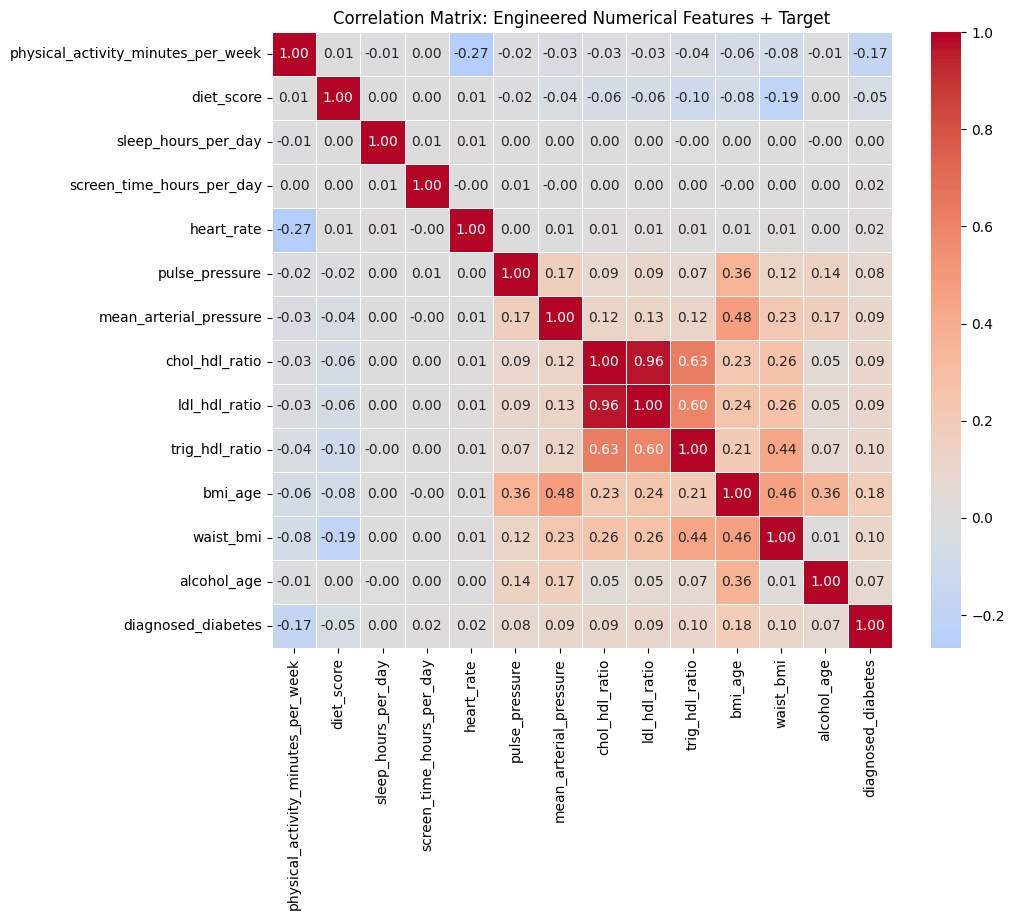

In [20]:
num_df = train_featured[numerical_cols]

# 2) Add target
num_df_with_target = num_df.copy()
num_df_with_target["diagnosed_diabetes"] = y  # y = target series

# 3) Compute correlation matrix
corr_matrix = num_df_with_target.corr(method="pearson")

# 4) Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix: Engineered Numerical Features + Target")
plt.show()

In [21]:
X = train_featured.drop(['id','diagnosed_diabetes'],axis = 1)
y = train_featured['diagnosed_diabetes']

# Apply preprocessing : 

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ("onehot", OneHotEncoder(handle_unknown="ignore"), nominal_cols),
        ("binary", "passthrough", binary_cols),
        ("numeric", StandardScaler(), numerical_cols)
    ]
)


X_processed = preprocessor.fit_transform(X)

print("Final input shape:", X_processed.shape)

Final input shape: (700000, 33)


In [23]:
# 1. Ordinal feature names (same as original)
ordinal_feature_names = ordinal_cols

# 2. One-hot feature names (expanded)
ohe = preprocessor.named_transformers_["onehot"]
ohe_feature_names = ohe.get_feature_names_out(nominal_cols)

# 3. Binary feature names
binary_feature_names = binary_cols

# 4. Numerical feature names
numerical_feature_names = numerical_cols

# 5. Combine all in final order
final_feature_names = (
    ordinal_feature_names 
    + ohe_feature_names.tolist()
    + binary_feature_names
    + numerical_feature_names
)
df = pd.DataFrame(X_processed, columns=final_feature_names)

In [24]:
df.head()

,education_level,income_level,gender_Female,gender_Male,gender_Other,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,...,screen_time_hours_per_day,heart_rate,pulse_pressure,mean_arterial_pressure,chol_hdl_ratio,ldl_hdl_ratio,trig_hdl_ratio,bmi_age,waist_bmi,alcohol_age
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.253489,-0.744770,-0.728125,-1.672293,-0.457349,-0.518567,-1.087658,0.234734,-0.956879,0.262379
1,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.526305,0.119943,0.012068,0.580601,-0.895525,-0.851464,-0.239759,0.072165,0.663316,-0.074141
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.537531,2.137607,-1.468318,0.419680,-0.652653,-0.688296,-0.085569,-1.410115,-0.334668,-1.184658
3,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.500682,-1.321245,-0.316907,0.848802,1.645641,1.480957,0.066336,-0.331935,-1.007635,-0.006837
4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.883602,-1.033008,-0.563638,0.687881,-0.438565,-0.396110,-0.055188,-0.471570,0.706121,0.211901


In [25]:
df.columns

Index(['education_level', 'income_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White',
       'smoking_status_Current', 'smoking_status_Former',
       'smoking_status_Never', 'employment_status_Employed',
       'employment_status_Retired', 'employment_status_Student',
       'employment_status_Unemployed', 'family_history_diabetes',
       'hypertension_history', 'cardiovascular_history',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'heart_rate',
       'pulse_pressure', 'mean_arterial_pressure', 'chol_hdl_ratio',
       'ldl_hdl_ratio', 'trig_hdl_ratio', 'bmi_age', 'waist_bmi',
       'alcohol_age'],
      dtype='object')

In [26]:
encoded_categorical_cols = (
    ordinal_feature_names
    + ohe_feature_names.tolist()
    + binary_feature_names
)

encoded_numeric_cols = numerical_feature_names


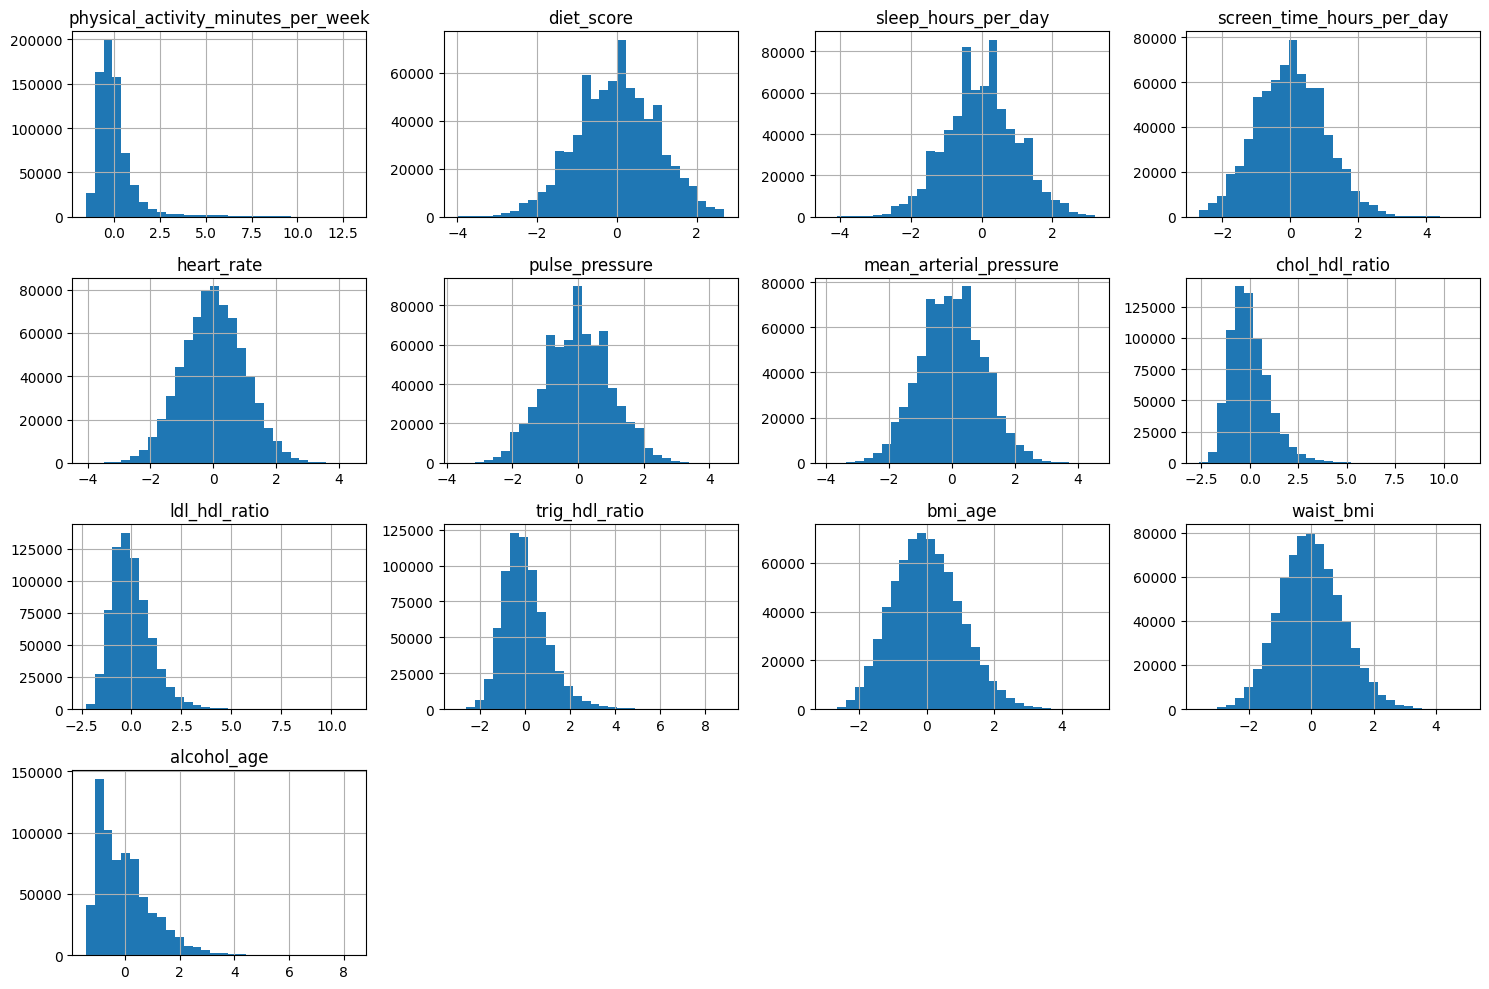

In [27]:
df[encoded_numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


In [28]:
X_raw = train_featured.drop(columns=["id", "diagnosed_diabetes"])
y = train_featured["diagnosed_diabetes"]


In [29]:
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(
    X_raw,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [30]:
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_valid_proc = preprocessor.transform(X_valid_raw)

# CatBoost model : 

In [31]:
cat_model = CatBoostClassifier(
    iterations=20000,
    depth=4,
    learning_rate=0.01,
    loss_function="Logloss",
    eval_metric="AUC",

    task_type="GPU",
    devices="0",
    bootstrap_type="Bernoulli",
    subsample=0.8,
    early_stopping_rounds=200,
    verbose=200
)

cat_model.fit(
    X_train_raw,
    y_train,
    eval_set=(X_valid_raw, y_valid),
    cat_features=categorical_cols
)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6737751	best: 0.6737751 (0)	total: 10.9s	remaining: 2d 12h 36m 58s
200:	test: 0.6942616	best: 0.6942616 (200)	total: 16.1s	remaining: 26m 25s
400:	test: 0.6981640	best: 0.6981640 (400)	total: 21.2s	remaining: 17m 17s
600:	test: 0.7006187	best: 0.7006187 (600)	total: 26.3s	remaining: 14m 8s
800:	test: 0.7028522	best: 0.7028522 (800)	total: 31.4s	remaining: 12m 31s
1000:	test: 0.7048495	best: 0.7048495 (1000)	total: 36.4s	remaining: 11m 31s
1200:	test: 0.7062573	best: 0.7062573 (1200)	total: 41.6s	remaining: 10m 51s
1400:	test: 0.7078766	best: 0.7078766 (1400)	total: 46.8s	remaining: 10m 21s
1600:	test: 0.7093760	best: 0.7093760 (1600)	total: 51.9s	remaining: 9m 56s
1800:	test: 0.7105939	best: 0.7105939 (1800)	total: 57s	remaining: 9m 36s
2000:	test: 0.7117748	best: 0.7117748 (2000)	total: 1m 2s	remaining: 9m 19s
2200:	test: 0.7127677	best: 0.7127677 (2200)	total: 1m 7s	remaining: 9m 3s
2400:	test: 0.7135249	best: 0.7135249 (2400)	total: 1m 12s	remaining: 8m 50s
2600:	test: 0.

# XGBoost :

In [32]:
xgb_model = XGBClassifier(
    n_estimators=20000,
    learning_rate=0.05,
    max_depth=4,

    subsample=0.8,
    colsample_bytree=0.8,

    objective="binary:logistic",
    eval_metric="auc",

    tree_method="gpu_hist",
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(
    X_train_proc,
    y_train,
    eval_set=[(X_valid_proc, y_valid)],
    early_stopping_rounds=200,
    verbose=100
)

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:00:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.67923
[100]	validation_0-auc:0.70368
[200]	validation_0-auc:0.71054
[300]	validation_0-auc:0.71446
[400]	validation_0-auc:0.71605
[500]	validation_0-auc:0.71748
[600]	validation_0-auc:0.71829
[700]	validation_0-auc:0.71884
[800]	validation_0-auc:0.71919
[900]	validation_0-auc:0.71948
[1000]	validation_0-auc:0.71988
[1100]	validation_0-auc:0.71998
[1200]	validation_0-auc:0.72022
[1300]	validation_0-auc:0.72031
[1400]	validation_0-auc:0.72031
[1500]	validation_0-auc:0.72034
[1600]	validation_0-auc:0.72035
[1700]	validation_0-auc:0.72036
[1800]	validation_0-auc:0.72031
[1900]	validation_0-auc:0.72030


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

# Ensemble learning : 

In [33]:
# CatBoost
cat_valid_probs = cat_model.predict_proba(X_valid_raw)[:, 1]
cat_valid_preds = (cat_valid_probs >= 0.5).astype(int)

# XGBoost
xgb_valid_probs = xgb_model.predict_proba(X_valid_proc)[:, 1]
xgb_valid_preds = (xgb_valid_probs >= 0.5).astype(int)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:00:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:00:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [34]:
def print_confusion(name, y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    print(f"\n{name} Confusion Matrix")
    print(f"TP (True Positive): {tp}")
    print(f"TN (True Negative): {tn}")
    print(f"FP (False Positive): {fp}")
    print(f"FN (False Negative): {fn}")

In [35]:
print_confusion("CatBoost", y_valid, cat_valid_preds)
print_confusion("XGBoost", y_valid, xgb_valid_preds)


CatBoost Confusion Matrix
TP (True Positive): 73368
TN (True Negative): 21697
FP (False Positive): 31042
FN (False Negative): 13893

XGBoost Confusion Matrix
TP (True Positive): 73235
TN (True Negative): 21864
FP (False Positive): 30875
FN (False Negative): 14026


# Threshold Tuning :

In [36]:
ensemble_valid_probs = (
    cat_valid_probs
    + xgb_valid_probs
) / 2

results = []

for t in np.arange(0.30, 0.70, 0.01):
    preds = (ensemble_valid_probs >= t).astype(int)
    
    acc = accuracy_score(y_valid, preds)
    rec = recall_score(y_valid, preds)
    f1  = f1_score(y_valid, preds)
    prec = precision_score(y_valid, preds)
    
    results.append((t, acc, rec, f1, prec))

df_thresh = pd.DataFrame(
    results,
    columns=["threshold", "accuracy", "recall", "f1", "precision"]
)

df_thresh.sort_values("accuracy", ascending=False).head(10)


,threshold,accuracy,recall,f1,precision
21,0.51,0.679529,0.827002,0.762860,0.707951
20,0.50,0.679307,0.840375,0.765626,0.703087
22,0.52,0.679143,0.812585,0.759444,0.712827
19,0.49,0.679121,0.853371,0.768265,0.698595
18,0.48,0.678993,0.866046,0.770809,0.694442
23,0.53,0.678429,0.797103,0.755501,0.718027
17,0.47,0.677807,0.877162,0.772406,0.690003
24,0.54,0.677421,0.782217,0.751419,0.722954
25,0.55,0.676500,0.766482,0.747065,0.728608
16,0.46,0.676071,0.887842,0.773587,0.685386


In [37]:
best_row = df_thresh.sort_values("accuracy", ascending=False).iloc[0]
best_threshold = best_row["threshold"]

best_row

threshold    0.510000
accuracy     0.679529
recall       0.827002
f1           0.762860
precision    0.707951
Name: 21, dtype: float64

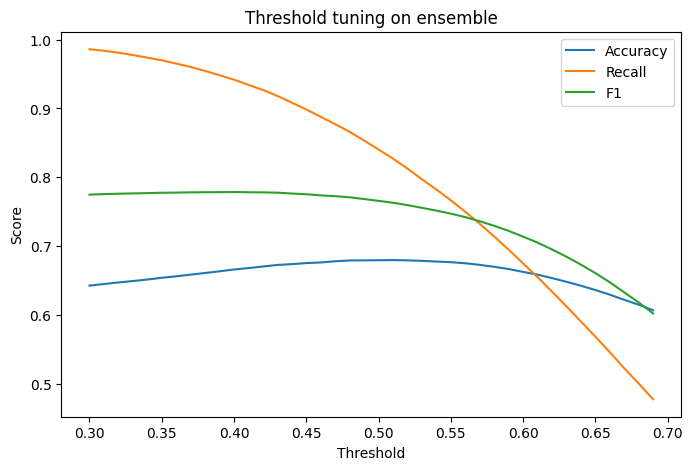

In [38]:
plt.figure(figsize=(8,5))
plt.plot(df_thresh["threshold"], df_thresh["accuracy"], label="Accuracy")
plt.plot(df_thresh["threshold"], df_thresh["recall"], label="Recall")
plt.plot(df_thresh["threshold"], df_thresh["f1"], label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Threshold tuning on ensemble")
plt.show()

# Prediction for test set : 

In [39]:
test_featured = apply_feature_engineering(test)

In [40]:
test_featured.head()

,id,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,heart_rate,gender,ethnicity,education_level,income_level,...,hypertension_history,cardiovascular_history,pulse_pressure,mean_arterial_pressure,chol_hdl_ratio,ldl_hdl_ratio,trig_hdl_ratio,bmi_age,waist_bmi,alcohol_age
0,700000,100,4.3,6.8,6.2,64,Female,White,Highschool,Middle,...,0,0,53,87.666667,3.800000,2.454545,2.018182,1147.5,21.420,180
1,700001,87,3.5,4.6,9.0,59,Female,White,Highschool,Middle,...,0,0,46,89.333333,3.382979,1.765957,3.085106,1001.0,25.168,35
2,700002,61,7.6,6.8,7.0,75,Male,White,Highschool,Low,...,0,0,41,84.666667,4.023256,2.302326,4.279070,1282.5,26.790,45
3,700003,81,7.3,7.3,5.0,61,Male,White,Graduate,Middle,...,0,0,33,92.000000,3.440678,1.966102,2.169491,1479.5,24.479,110
4,700004,29,7.3,7.6,8.5,79,Male,White,Graduate,Low,...,0,0,53,95.666667,3.000000,1.474576,2.254237,1694.0,18.260,154


In [41]:
X_test_raw = test_featured.drop(columns=["id"])
X_test_proc = preprocessor.transform(X_test_raw)

In [42]:
cat_test_probs = cat_model.predict_proba(X_test_raw)[:, 1]
xgb_test_probs = xgb_model.predict_proba(X_test_proc)[:, 1]

In [43]:
len(cat_test_probs) == len(xgb_test_probs) == len(test)

True

In [44]:
ensemble_test_probs = (
    cat_test_probs
    + xgb_test_probs
) / 2


In [45]:
submission = pd.DataFrame({
    "id": test["id"],
    "diagnosed_diabetes": ensemble_test_probs
})

submission.to_csv("submission.csv", index=False)
submission.head()

,id,diagnosed_diabetes
0,700000,0.542061
1,700001,0.661060
2,700002,0.776505
3,700003,0.426610
4,700004,0.919138
